# PyQuaza - Example

This notebook is intended to be an example showing the details of how PyQuaza obtains the forecasting images ultimately displayed through the GUI. PyQuaza consists of 4 main modules: pqFrame, pqBodyForecast, pqWeeklyForecast, pqGUI. 
- pqFrame: Pulls data for celestial body locations in the solar system and transforms those to a earth-based reference frame
- pqBodyForecast: Evaluates weather conditions and celestial body locations over a 7-day time frame; this data is used in a cost function to output the optimal celestial body viewing time
- pqWeeklyForecast: Performs similar evaluation as pqBodyForecast, but for all available celestial bodies to provide a more general forecast; the optimal body to view is selected through a cost function, and its optimal viewing time is displayed in the same manner as the specific body forecast
- pqGUI: Provides a user interface to input viewing location and desired celestial body (if applicable); outputs the optimal celestial body viewing time and cloud coverage conditions

## pqFrame

In [4]:
import pqFrame

In [2]:
# Set latitude and longitude values (normally input through GUI):
lat = 24
long = -85

# Set desired celestial body (normally selected from a drop-down list in GUI): 
body = 'Saturn'

In [3]:
# Main class of pqFrame is Transformations, taking inputs of the viewing location latitude and longitude
tf = pqFrame.Transformations(lat,long)

In [4]:
# in_my_sky attribute takes the desired celestial body as an input, and outputs its locations & times in the viewing location reference frame:
tf.in_my_sky(body)

<SkyCoord (AltAz: obstime=[datetime.datetime(2022, 12, 11, 0, 0)
 datetime.datetime(2022, 12, 11, 0, 5, 0, 148883)
 datetime.datetime(2022, 12, 11, 0, 10, 0, 297767) ...
 datetime.datetime(2022, 12, 17, 23, 49, 59, 702233)
 datetime.datetime(2022, 12, 17, 23, 54, 59, 851117)
 datetime.datetime(2022, 12, 18, 0, 0)], location=(508113.38378375, -5807762.55238131, 2578283.42207525) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, AU)
    [(220.61184289, 39.77381665, 10.27045677),
     (221.82950528, 39.01909087, 10.27050786),
     (223.0153421 , 38.24646231, 10.27055897), ...,
     (224.39227348, 37.54832275, 10.36908576),
     (225.5163254 , 36.73912357, 10.36913347),
     (226.61075018, 35.91438516, 10.36918119)]>

In [5]:
# sun_for_me attribute outputs locations & times for the sun in the viewing location reference frame:
tf.sun_for_me()

<SkyCoord (AltAz: obstime=[datetime.datetime(2022, 12, 11, 0, 0)
 datetime.datetime(2022, 12, 11, 0, 5, 0, 148883)
 datetime.datetime(2022, 12, 11, 0, 10, 0, 297767) ...
 datetime.datetime(2022, 12, 17, 23, 49, 59, 702233)
 datetime.datetime(2022, 12, 17, 23, 54, 59, 851117)
 datetime.datetime(2022, 12, 18, 0, 0)], location=(508113.38378375, -5807762.55238131, 2578283.42207525) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, AU)
    [(251.12931326, -14.93763014, 0.98476745),
     (251.53633758, -16.01977268, 0.98476782),
     (251.93815068, -17.10446569, 0.9847682 ), ...,
     (249.63157151, -12.21237083, 0.98408572),
     (250.05095201, -13.28454578, 0.98408622),
     (250.4644647 , -14.35955145, 0.98408672)]>

In [6]:
# check_weather attribute pulls percent cloud coverage forecasts for the viewing location:
tf.check_weather()

array([ 3,  0,  1,  4, 72, 46, 24], dtype=int64)

## pqBodyForecast

In [7]:
import pqBodyForecast

In [8]:
# Main class for pqBodyForecast is BodyForecast, taking inputs of the latitude, longitude, and desired celestial body
bf = pqBodyForecast.BodyForecast(lat, long, body)

# body_this_week attribute outputs AltAz positions for the desired celestial body and the sun, as well as the viewing time frame and increments:
bf.body_this_week()

(<SkyCoord (AltAz: obstime=[datetime.datetime(2022, 12, 11, 0, 0)
  datetime.datetime(2022, 12, 11, 0, 5, 0, 148883)
  datetime.datetime(2022, 12, 11, 0, 10, 0, 297767) ...
  datetime.datetime(2022, 12, 17, 23, 49, 59, 702233)
  datetime.datetime(2022, 12, 17, 23, 54, 59, 851117)
  datetime.datetime(2022, 12, 18, 0, 0)], location=(508113.38378375, -5807762.55238131, 2578283.42207525) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, AU)
     [(220.61184289, 39.77381665, 10.27045677),
      (221.82950528, 39.01909087, 10.27050786),
      (223.0153421 , 38.24646231, 10.27055897), ...,
      (224.39227348, 37.54832275, 10.36908576),
      (225.5163254 , 36.73912357, 10.36913347),
      (226.61075018, 35.91438516, 10.36918119)]>,
 <SkyCoord (AltAz: obstime=[datetime.datetime(2022, 12, 11, 0, 0)
  datetime.datetime(2022, 12, 11, 0, 5, 0, 148883)
  datetime.datetime(2022, 12, 11, 0, 10, 0, 297767) ...
  datetime.datetime(2

In [9]:
#set_body_df attribute compiles viewing time frame information, body and sun AltAz data, and cloud coverage forecasts into a pandas data frame:
bf.set_body_df()

,day,month,year,hour,minute,deltahrs,sunalt,bodyalt,bodyaz,clouds
0,11,12,2022,0,0,0.000000,-14.937630,39.773817,220.611843,3
1,11,12,2022,0,5,0.083375,-16.019773,39.019091,221.829505,3
2,11,12,2022,0,10,0.166749,-17.104466,38.246462,223.015342,3
3,11,12,2022,0,15,0.250124,-18.191624,37.456726,224.170088,3
4,11,12,2022,0,20,0.333499,-19.281165,36.650648,225.294518,3
...,...,...,...,...,...,...,...,...,...,...
2011,17,12,2022,23,39,167.666501,-10.076911,39.117127,222.052032,24
2012,17,12,2022,23,44,167.749876,-11.143125,38.341246,223.237773,24
2013,17,12,2022,23,49,167.833251,-12.212371,37.548323,224.392273,24
2014,17,12,2022,23,54,167.916625,-13.284546,36.739124,225.516325,24


In [10]:
#cut_daytime attribute removes data frame rows corresponding to times when the sun altitude is above -18 degrees (i.e. ensure best viewing time will be at night):
bf.cut_daytime()

,day,month,year,hour,minute,deltahrs,sunalt,bodyalt,bodyaz,clouds
3,11,12,2022,0,15,0.250124,-18.191624,37.456726,224.170088,3
4,11,12,2022,0,20,0.333499,-19.281165,36.650648,225.294518,3
5,11,12,2022,0,25,0.416873,-20.373010,35.828963,226.389437,3
6,11,12,2022,0,30,0.500248,-21.467081,34.992377,227.455672,3
7,11,12,2022,0,35,0.583623,-22.563306,34.141565,228.494066,3
...,...,...,...,...,...,...,...,...,...,...
1854,17,12,2022,10,34,154.576675,-22.544114,-72.960215,63.619714,24
1855,17,12,2022,10,39,154.660050,-21.450543,-71.925001,65.679400,24
1856,17,12,2022,10,44,154.743424,-20.359168,-70.873643,67.540225,24
1857,17,12,2022,10,49,154.826799,-19.270062,-69.808719,69.230995,24


In [11]:
#finally, best_time attribute uses a cost function accounting for the body position & location weather forecast to output an optimal viewing time:
bf.best_time()
bf.best_time_val

day           12.000000
month         12.000000
year        2022.000000
hour           0.000000
minute        15.000000
deltahrs      24.262035
sunalt       -18.273420
bodyalt       36.776299
bodyaz       225.169553
clouds         0.000000
Name: 291, dtype: float64

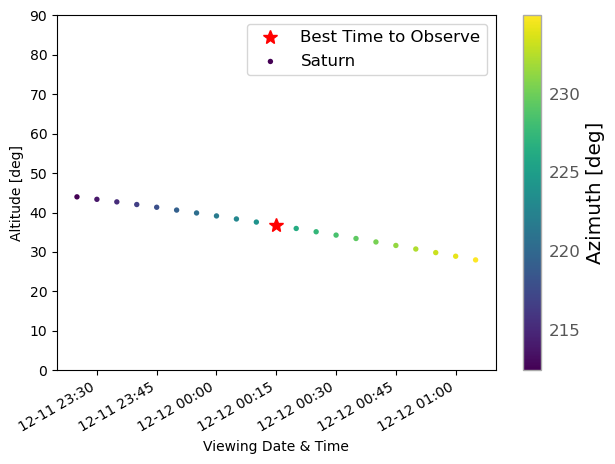

In [12]:
#plot_onebody attribute outputs a matplotlib figure showing the body trajectory (altitude & azimuth) vs time, with a marker on the best observation time:
bf.plot_onebody()
bf.fig

## pqWeeklyForecast

In [13]:
import pqWeeklyForecast

In [14]:
# Main class of pqWeeklyForecast is WeeklyForecase, taking inputs of the viewing location latitude and longitude
wf = pqWeeklyForecast.WeeklyForecast(lat, long)

In [15]:
# milkyway_this_week evaluates all available celestial bodies based on weather & average proximity to find ideal body to view
# (takes longer to run than simple BodyForecast, as program cycles through all available body choices)
wf.milkyway_this_week()

'mars'

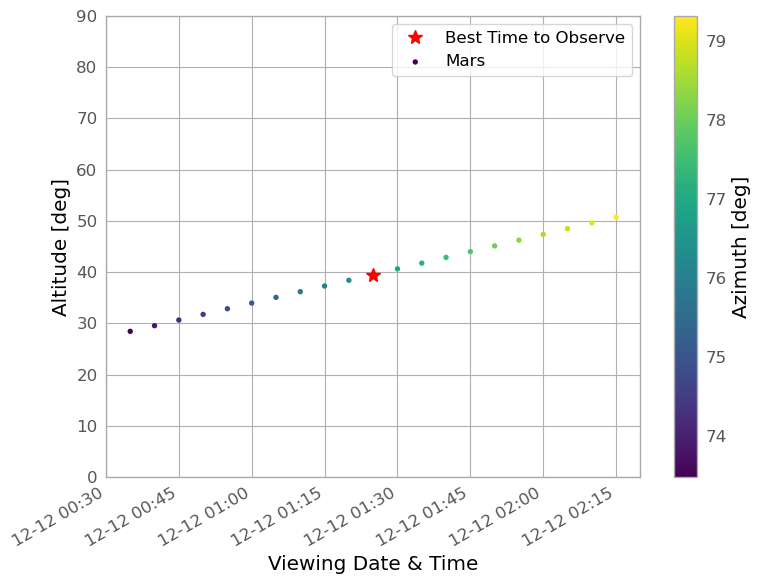

In [16]:
# get_plot utilizes the same plotting functionality as in pqBodyForecast to display the optimal viewing time
wf.get_plot()
wf.fig

## pqGUI

In [2]:
from PyQt5 import QtCore, QtGui, QtWidgets
import pqBodyForecast as bf
import pqWeeklyForecast as wf

In [3]:
class Ui_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(1248, 891)
        MainWindow.setStyleSheet("background-color: rgb(223,223,223);")

        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        
        self.latEntry = QtWidgets.QSpinBox(self.centralwidget)
        self.latEntry.setGeometry(QtCore.QRect(130, 210, 81, 31))
        self.latEntry.setMinimum(-90)
        self.latEntry.setMaximum(90)
        self.latEntry.setObjectName("latEntry")
        self.latEntry.setStyleSheet("background-color: White;")
        
        self.lonEntry = QtWidgets.QSpinBox(self.centralwidget)
        self.lonEntry.setGeometry(QtCore.QRect(130, 250, 81, 31))
        self.lonEntry.setMinimum(-180)
        self.lonEntry.setMaximum(180)
        self.lonEntry.setObjectName("lonEntry")
        self.lonEntry.setStyleSheet("background-color: White;")
        
        self.label_latEntry = QtWidgets.QLabel(self.centralwidget)
        self.label_latEntry.setGeometry(QtCore.QRect(30, 210, 91, 31))
        self.label_latEntry.setObjectName("label_latEntry")
        
        self.label_lonEntry = QtWidgets.QLabel(self.centralwidget)
        self.label_lonEntry.setGeometry(QtCore.QRect(30, 250, 91, 31))
        self.label_lonEntry.setObjectName("label_lonEntry")
        
        self.forecastImage = QtWidgets.QLabel(self.centralwidget)
        self.forecastImage.setGeometry(QtCore.QRect(450, 190, 780, 650))
        self.forecastImage.setText("")
        self.forecastImage.setPixmap(QtGui.QPixmap("forecastImage.png"))
        self.forecastImage.setScaledContents(True)
        self.forecastImage.setObjectName("forecastImage")
        self.forecastImage.setStyleSheet("border: 1px solid black;")
        
        self.pyquazaLogo = QtWidgets.QLabel(self.centralwidget)
        self.pyquazaLogo.setGeometry(QtCore.QRect(20, 10, 471, 171))
        self.pyquazaLogo.setText("")
        self.pyquazaLogo.setPixmap(QtGui.QPixmap("pyquazaLogo.png"))
        self.pyquazaLogo.setObjectName("pyquazaLogo")
        
        self.pyquazaOverview = QtWidgets.QTextBrowser(self.centralwidget)
        self.pyquazaOverview.setGeometry(QtCore.QRect(480, 20, 751, 155))
        self.pyquazaOverview.setObjectName("pyquazaOverview")
        self.pyquazaOverview.setStyleSheet("background-color: White;")
        
        self.forecastOutputText = QtWidgets.QTextBrowser(self.centralwidget)
        self.forecastOutputText.setGeometry(QtCore.QRect(230, 190, 211, 651))
        self.forecastOutputText.setObjectName("forecastOutputText")
        self.forecastOutputText.setStyleSheet("background-color: White; font: bold 14px;")
        
        self.specificBodyButton = QtWidgets.QPushButton(self.centralwidget)
        self.specificBodyButton.setGeometry(QtCore.QRect(30, 390, 181, 51))
        self.specificBodyButton.setObjectName("specificBodyButton")
        self.specificBodyButton.setStyleSheet("background-color: White;")
        
        self.comboBox = QtWidgets.QComboBox(self.centralwidget)
        self.comboBox.setGeometry(QtCore.QRect(30, 350, 111, 31))
        self.comboBox.setObjectName("comboBox")
        self.comboBox.addItem("")
        self.comboBox.addItem("")
        self.comboBox.addItem("")
        self.comboBox.addItem("")
        self.comboBox.addItem("")
        self.comboBox.addItem("")
        self.comboBox.addItem("")
        self.comboBox.addItem("")
        self.comboBox.setStyleSheet("background-color: White;")
        
        self.label_bodySelect = QtWidgets.QLabel(self.centralwidget)
        self.label_bodySelect.setGeometry(QtCore.QRect(30, 310, 181, 41))
        self.label_bodySelect.setObjectName("label_bodySelect")
                
        self.generalForecastButton = QtWidgets.QPushButton(self.centralwidget)
        self.generalForecastButton.setGeometry(QtCore.QRect(30, 700, 181, 51))
        self.generalForecastButton.setObjectName("generalForecastButton")
        self.generalForecastButton.setStyleSheet("background-color: White;")
        
        self.label_bodySelect_2 = QtWidgets.QLabel(self.centralwidget)
        self.label_bodySelect_2.setGeometry(QtCore.QRect(30, 650, 181, 41))
        self.label_bodySelect_2.setAlignment(QtCore.Qt.AlignCenter)
        self.label_bodySelect_2.setObjectName("label_bodySelect_2")
       
        self.specificBodyLogo = QtWidgets.QLabel(self.centralwidget)
        self.specificBodyLogo.setGeometry(QtCore.QRect(30, 450, 181, 181))
        self.specificBodyLogo.setText("")
        self.specificBodyLogo.setPixmap(QtGui.QPixmap("moon.png"))
        self.specificBodyLogo.setScaledContents(True)
        self.specificBodyLogo.setObjectName("specificBodyLogo")
        
        MainWindow.setCentralWidget(self.centralwidget)
        self.menubar = QtWidgets.QMenuBar(MainWindow)
        self.menubar.setGeometry(QtCore.QRect(0, 0, 1248, 21))
        self.menubar.setObjectName("menubar")
        MainWindow.setMenuBar(self.menubar)
        self.statusbar = QtWidgets.QStatusBar(MainWindow)
        self.statusbar.setObjectName("statusbar")
        MainWindow.setStatusBar(self.statusbar)

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)

################# Manual Code ##################

        # Tie GUI buttons to target functions below:
        self.specificBodyButton.clicked.connect(self.showSpecificBody)
        self.comboBox.currentTextChanged.connect(self.showSpecificBodyImage)
        self.generalForecastButton.clicked.connect(self.showGeneralForecast)

    def showSpecificBodyImage(self):
        # Show sample image of user-selected planet #
        body = self.comboBox.currentText() #Pull user-selected body choice
        bodyLogoFile = f"{body}.png" #Establish file name (predetermined)
        self.specificBodyLogo.setPixmap(QtGui.QPixmap(bodyLogoFile))
    
    def showSpecificBody(self):
        # Process body forecast & dispay to user #
        _translate = QtCore.QCoreApplication.translate
        lat = self.latEntry.value() #Pull user-entered latitude entry
        lon = self.lonEntry.value() #Pull user-entered longitude entry
        body = self.comboBox.currentText() #Pull user-selected body choice           
              
        if body == 'Earth':
            self.forecastOutputText.setText(_translate("MainWindow", "Maybe just look down?"))
            self.forecastImage.setPixmap(QtGui.QPixmap("outputIfEarth.png"))
        else:     
            bodyForecast = bf.BodyForecast(lat, lon, body)
            bodyForecast.run_all()
            self.forecastOutputText.setText(_translate("MainWindow", bodyForecast.figText))
            self.forecastImage.setPixmap(QtGui.QPixmap("body.png"))
        
    def showGeneralForecast(self):
        # Process general forecast & display to user #
        _translate = QtCore.QCoreApplication.translate
        lat = self.latEntry.value() #Pull user-entered latitude entry
        lon = self.lonEntry.value() #Pull user-entered longitude entry
        genForecast = wf.WeeklyForecast(lat,lon)
        genForecast.get_plot()
        self.forecastOutputText.setText(_translate("MainWindow", genForecast.figText))
        self.forecastImage.setPixmap(QtGui.QPixmap("body.png"))

##################################################

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "MainWindow"))
        self.label_latEntry.setText(_translate("MainWindow", "Enter Latitude:"))
        self.label_lonEntry.setText(_translate("MainWindow", "Enter Longitude:"))
        self.pyquazaOverview.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'MS Shell Dlg 2\'; font-size:8.25pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:10pt; font-weight:600;\">About PyQuaza</span></p>\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:10pt;\">PyQuaza is a forecasting resource for amateur astronomers to optimize their stargazing experiences! Use the widgets below to forecast optimal viewing times for a specific astrological body, or for the best option from the list of available bodies. </span></p>\n"
"<p style=\"-qt-paragraph-type:empty; margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px; font-size:10pt;\"><br /></p>\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:10pt; font-weight:600;\">How To Use</span></p>\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:10pt;\">First, enter the latitude (-90, 90) and longitude (-180, 180) of the viewing location. To find the best viewing time for a specific astrological body, select a planet from the drop-down menu and hit &quot;Display Planet Forecast&quot;. To evaluate the general list of celestial bodies to display an optimal body choice & viewing time, simply hit &quot;Display General Forecast&quot;. Note that both forecast options are evaluated over a 7-day time frame, starting from today's date.</span></p></body></html>"))
        self.specificBodyButton.setText(_translate("MainWindow", "Display Planet Forecast"))
        self.comboBox.setItemText(0, _translate("MainWindow", "Moon"))
        self.comboBox.setItemText(1, _translate("MainWindow", "Mercury"))
        self.comboBox.setItemText(2, _translate("MainWindow", "Venus"))
        self.comboBox.setItemText(3, _translate("MainWindow", "Earth"))
        self.comboBox.setItemText(4, _translate("MainWindow", "Mars"))
        self.comboBox.setItemText(5, _translate("MainWindow", "Jupiter"))
        self.comboBox.setItemText(6, _translate("MainWindow", "Saturn"))
        self.comboBox.setItemText(7, _translate("MainWindow", "Uranus"))
        self.comboBox.setItemText(8, _translate("MainWindow", "Neptune"))
        self.label_bodySelect.setText(_translate("MainWindow", "Select Celestial Body of Interest:"))
        self.generalForecastButton.setText(_translate("MainWindow", "Display General Forecast"))
        self.label_bodySelect_2.setText(_translate("MainWindow", "-- OR --"))

if __name__ == "__main__":
    import sys  
    app = QtWidgets.QApplication(sys.argv)
    MainWindow = QtWidgets.QMainWindow()
    ui = Ui_MainWindow()
    ui.setupUi(MainWindow)
    MainWindow.show()
    app.exec_()